<a href="https://colab.research.google.com/github/ush-naaa/DevHUB/blob/main/NOV/Task%204/Insurance_Claim_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **Upload Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (4).csv


# **Load Dataset**

In [ ]:
df = pd.read_csv("insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# **Encode Categorical Columns**

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# **EDA: Age vs Charges**

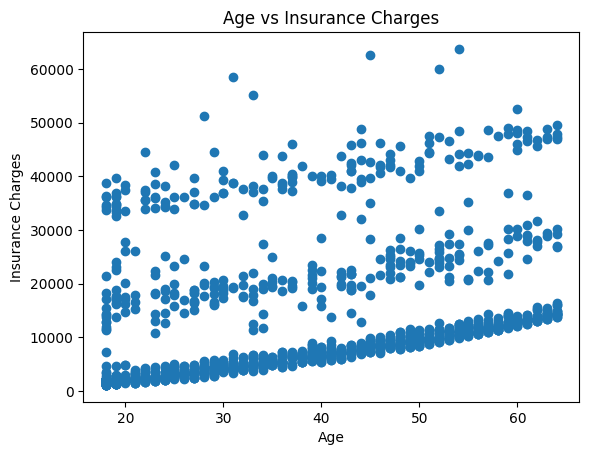

In [ ]:
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.title("Age vs Insurance Charges")
plt.show()

# **EDA: BMI vs Charges**

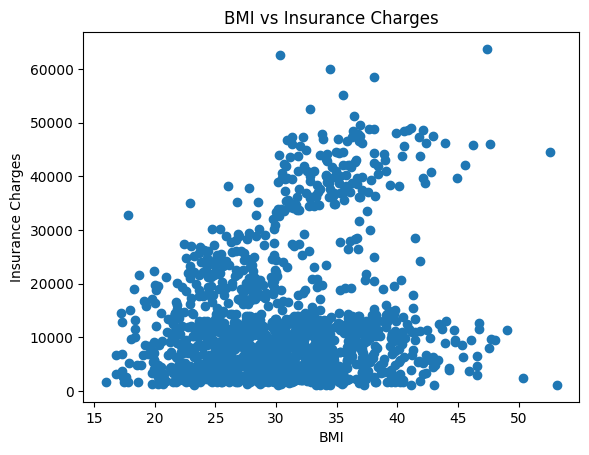

In [ ]:
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.title("BMI vs Insurance Charges")
plt.show()

# **EDA: Smoking Impact**

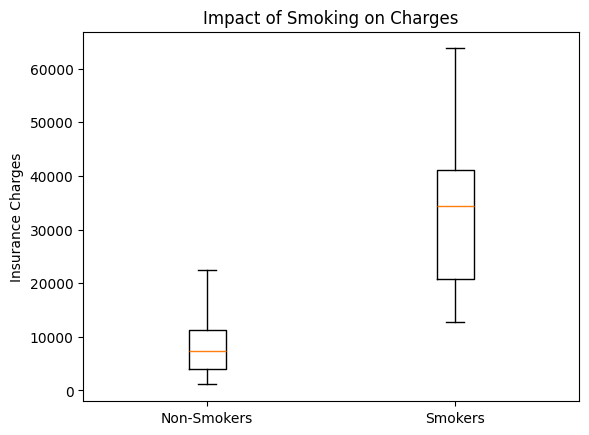

In [ ]:
# (Fixed for Matplotlib 3.9+)
plt.boxplot(
    [df[df['smoker_yes']==0]['charges'],
     df[df['smoker_yes']==1]['charges']],
    tick_labels=['Non-Smokers', 'Smokers'],
    showfliers=False
)
plt.title("Impact of Smoking on Charges")
plt.ylabel("Insurance Charges")
plt.show()



# **Split Features and Target**

In [ ]:
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Train Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# **Evaluate Model (MAE & RMSE)**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance:")
print("MAE:", mae)
print("RMSE:", rmse)


Model Performance:
MAE: 4181.19447375365
RMSE: 5796.284659276273


# **Conclusion:**
The linear regression model shows moderate accuracy in predicting insurance charges, with an **MAE** of **4181.19** and an **RMSE** of **5796.28**. The results confirm that smoking status, BMI, and age significantly influence medical costs. Overall, the model captures key trends but still leaves room for improving prediction precision.